# Kaggle - Titanic
check out more information about the data: https://www.kaggle.com/c/titanic

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import warnings


# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# read data

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

print(train_df.head())
print(train_df.shape)
print('\n')
print(test_df.head())
print(test_df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

## Data Preprocessing
You can modify the code here to extract your own features.

In [3]:
data = train_df.append(test_df)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
data.reset_index(inplace=True,drop=True)

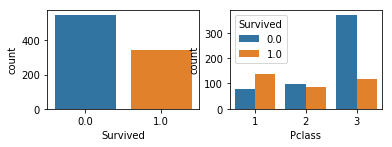

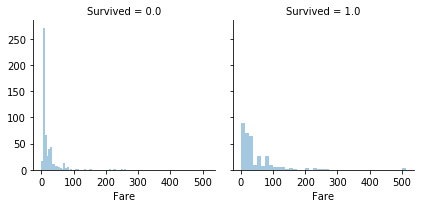

In [5]:
plt.subplot(2, 2, 1)
sns.countplot(data['Survived'])
plt.subplot(2, 2, 2)
#觀察艙等跟生存率的關係，可以發現在1艙等的生存率最高、再來是2艙等、最後是3艙等的

sns.countplot(data['Pclass'],hue=data['Survived'])
#票價跟生存率的關係，可以發現票價低的乘客死亡率高出許多
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Fare',kde=False)


In [6]:
# drop unnecessary columns

print(train_df.shape)
print(test_df.shape)

#drop_columns_list = [' 'Cabin', 'Name']
#drop_columns_list = ['Ticket', 'Cabin', 'Name','Fare']
drop_columns_list = ['Ticket', 'Name','Cabin']
train_df = train_df.drop(drop_columns_list, axis=1)
test_df = test_df.drop(drop_columns_list, axis=1)

train_df = train_df.drop(['PassengerId'], axis=1)

print('\n')
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


(891, 8)
(418, 8)


In [7]:
#train_df['Fare']=train_df['Fare'].fillna(data['Fare'].mean())
#test_df['Fare']=test_df['Fare'].fillna(data['Fare'].mean())


In [8]:
# convert `Sex` to numerical values

print(train_df.head())

train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

print(train_df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S


In [9]:
# replace `Age` with ordinals

print(train_df.head())

train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age']

test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[ test_df['Age'] > 64, 'Age']

print(train_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S
   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    0  1.0      1      0   7.2500        S
1         1       1    1  2.0      1      0  71.2833        C
2         1       3    1  1.0      0      0   7.9250        S
3         1       1    1  2.0      1      0  53.1000        S
4         0       3    0  2.0      0      0   8.0500        S


In [10]:
# fill missing values in column `Embarked` with the most common value

common_port = train_df['Embarked'].dropna().mode()[0]
print(common_port)
train_df['Embarked'] = train_df['Embarked'].fillna(common_port)
test_df['Embarked'] = test_df['Embarked'].fillna(common_port)

# convert `Embarked` to numerical values

print(train_df.head())

train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

print(train_df.head())

S
   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    0  1.0      1      0   7.2500        S
1         1       1    1  2.0      1      0  71.2833        C
2         1       3    1  1.0      0      0   7.9250        S
3         1       1    1  2.0      1      0  53.1000        S
4         0       3    0  2.0      0      0   8.0500        S
   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0         0       3    0  1.0      1      0   7.2500         0
1         1       1    1  2.0      1      0  71.2833         1
2         1       3    1  1.0      0      0   7.9250         0
3         1       1    1  2.0      1      0  53.1000         0
4         0       3    0  2.0      0      0   8.0500         0


In [11]:
# drop rows with missing values

print(train_df.shape)
print(test_df.shape)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

print('\n')
print(train_df.shape)
print(test_df.shape)

(891, 8)
(418, 8)


(714, 8)
(331, 8)


In [12]:
# make training & testint data

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

print(X_train.shape)
print(X_train.head())
print('\n')
print(Y_train.shape)
print(Y_train.head())
print('\n')
print(X_test.shape)
print(X_test.head())
print('\n')

(714, 7)
   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0       3    0  1.0      1      0   7.2500         0
1       1    1  2.0      1      0  71.2833         1
2       3    1  1.0      0      0   7.9250         0
3       1    1  2.0      1      0  53.1000         0
4       3    0  2.0      0      0   8.0500         0


(714,)
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


(331, 7)
   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0       3    0  2.0      0      0   7.8292         2
1       3    1  2.0      1      0   7.0000         0
2       2    0  3.0      0      0   9.6875         2
3       3    0  1.0      0      0   8.6625         0
4       3    1  1.0      1      1  12.2875         0




## Predict & Generate submission data
You can tune the model parameters here! 

Submission data files would be in the `output` directory. You can upload the submission files to the competition on Kaggle to check out the accuracies of your predictions on testing data.

In [13]:
# logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, Y_train)
print('training accuracy: %.5f' % acc_log)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission_logreg.csv', index=False)


training accuracy: 0.78431


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


IF drop_columns_list = ['Ticket', 'Cabin', 'Name','Fare']   training accuracy: 0.78852
如果把空缺的票價用全部DATA的平均填上後的  training accuracy: 0.78431

In [14]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)
print('training accuracy: %.5f' % acc_svc)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission_svc.csv', index=False)

training accuracy: 0.85994


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


IF drop_columns_list = ['Ticket', 'Cabin', 'Name','Fare']   training accuracy: 0.83193
如果把空缺的票價用全部DATA的平均填上後的  training accuracy: 0.85994

In [15]:
# knn

knn = KNeighborsClassifier(n_neighbors = 3,leaf_size=30)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train)
print('training accuracy: %.5f' % acc_knn)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission_knn.csv', index=False)

training accuracy: 0.87115


IF drop_columns_list = ['Ticket', 'Cabin', 'Name','Fare']   training accuracy: 0.82773
如果把空缺的票價用全部DATA的平均填上後的 training accuracy: 0.87115

In [16]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, Y_train)
print('training accuracy: %.5f' % acc_gaussian)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission_gaussian.csv', index=False)

training accuracy: 0.77451


IF drop_columns_list = ['Ticket', 'Cabin', 'Name','Fare']   training accuracy: 0.76471
如果把空缺的票價用全部DATA的平均填上後的  training accuracy: 0.0.77451

In [17]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train)
print('training accuracy: %.5f' % acc_decision_tree)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission_decision_tree.csv', index=False)

training accuracy: 0.94398


IF drop_columns_list = ['Ticket', 'Cabin', 'Name','Fare']   training accuracy: 0.86275
如果把空缺的票價用全部DATA的平均填上後的  training accuracy: 0.94398

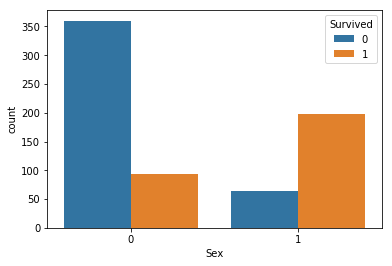

In [18]:
sns.countplot(train_df['Sex'],hue=train_df['Survived'])



C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


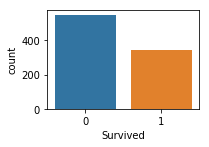

In [34]:
data1 = train_df.append(test_df)
data1.reset_index(inplace=True,drop=True)
plt.subplot(2, 2, 1)
sns.countplot(data['Survived'])

#觀察艙等跟生存率的關係，可以發現在1艙等的生存率最高、再來是2艙等、最後是3艙等的


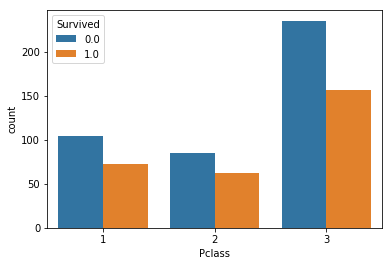

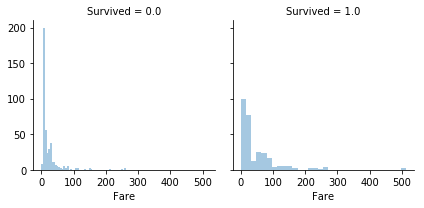

In [33]:
sns.countplot(data['Pclass'],hue=data1['Survived'])
#票價跟生存率的關係，可以發現票價低的乘客死亡率高出許多
g=sns.FacetGrid(data1,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

# try

In [19]:
PATH = 'train.csv'
data = pd.read_csv(PATH)#.replace(np.nan,np.mean(data.Age.values))
columns=data.columns.values
columns

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Data Preprocessing

In [20]:
# Mapping Genders
sex = data['Sex'].replace(['female','male'],[0,1])
data.Sex = sex

In [21]:
#cabin = data.Cabin.replace(['C','E'],[1,2])
age = data.Age.values
age = age[~np.isnan(age)]
data['Age'].replace(np.nan,np.mean(age),inplace = True)
fare = data.Fare.values
fare = fare[~np.isnan(fare)]
data['Fare'].replace(np.nan,np.mean(fare), inplace = True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [22]:
data.Pclass = data.Pclass.astype(int)
data.Sex = data.Sex.astype(int)
data.Age = data.Age.astype(float)
data.SibSp = data.SibSp.astype(int)
data.Parch = data.Parch.astype(int)
data.Fare = data.Fare.astype(float)

# Drop unnecessary columns & Remove Label
Dropped:
- PassengerId
- Name
- Ticket
- Parch
- Cabin
- Embarked

In [23]:
# Remove Label
y=data['Survived'].values
temp_data=data.drop(['Survived'],axis=1)

In [24]:
# Drop unnecessary colum
###trial###
temp_data=temp_data.drop(['PassengerId', 'Name','Ticket','Parch','Cabin','Embarked'],axis=1)
###
'''
age = temp_data.Age.values
age = (age-np.mean(age))/np.var(age)
fare = temp_data.Fare.values
fare = (fare-np.mean(fare))/np.var(fare)
temp_data.Age = age
temp_data.Fare = fare
'''

'\nage = temp_data.Age.values\nage = (age-np.mean(age))/np.var(age)\nfare = temp_data.Fare.values\nfare = (fare-np.mean(fare))/np.var(fare)\ntemp_data.Age = age\ntemp_data.Fare = fare\n'

In [25]:
x=temp_data.values
columns = temp_data.columns.values

# Test/Train split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

y_test=y_test[:,np.newaxis]

# Logistic Regression

In [27]:
mms=StandardScaler()#正規化
x_train_std=mms.fit_transform(x_train)
x_test_std=mms.fit_transform(x_test)
#'''
from sklearn.linear_model import LogisticRegression
#LogisticRegression(penalty='l1')

lr=LogisticRegression(penalty='l1', C=0.1)#l1+0.1的學習速率


lr=lr.fit(x_train_std, y_train)# 擬合模型

print(lr.score(x_train_std, y_train))#training的準確度

print(lr.score(x_test_std, y_test))#test的準確度


print(lr.coef_)#抓取所有的權重

for i in range(0,5):
    print(columns[i], lr.coef_[0][i])#print 所有權種
    
csv = pd.DataFrame(lr.predict(x_test_std)).to_csv('predict.csv', index = False)
#'''


0.797752808988764
0.7947761194029851
[[-0.70891188 -1.13066601 -0.30434808 -0.25333446  0.01496743]]
Pclass -0.7089118837537659
Sex -1.1306660101864445
Age -0.30434808067324365
SibSp -0.25333446473172017
Fare 0.014967434127729561


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
clf = tree.DecisionTreeClassifier(criterion  = 'entropy', max_depth = 3)
clf = clf.fit(x_train_std,y_train)
print(clf.score(x_train_std, y_train))
print(clf.score(x_test_std, y_test))

0.8362760834670947
0.8208955223880597
